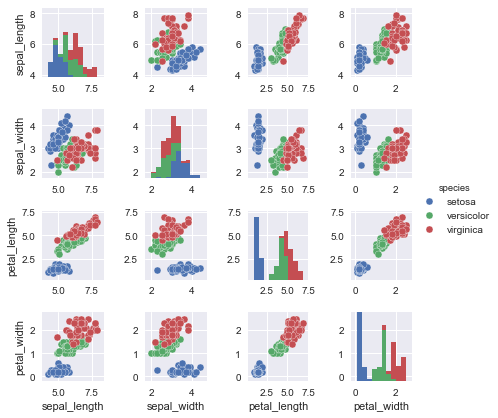

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns; sns.set()

# 加载测试数据
iris = sns.load_dataset('iris')
# 测试数据两两特征关系图
sns.pairplot(iris, hue='species', size=1.5);


斜率= [ 1.9776566]
截距= -0.903310725531


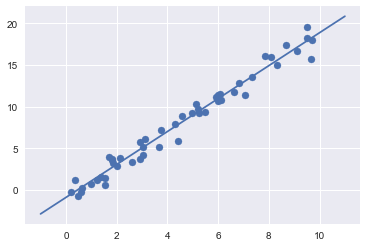

In [12]:
# 线性回归例子
from sklearn.linear_model import LinearRegression

# 生成线性回归测试数据
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)

# 在原来的数组上增加一个维度
X = x[:, np.newaxis]

# 参数fit_intercept为是否计算截距，normalize是否正则化（减少过拟合）
model = LinearRegression(fit_intercept=True, normalize=True)
model.fit(X, y)

# 斜率，实际值等于2
print('斜率=',model.coef_)
# 截距，即x等于0时候y的值
print('截距=',model.intercept_)

xfit = np.linspace(-1, 11)
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

plt.scatter(x, y)
plt.plot(xfit, yfit)

In [3]:
# 高斯朴素贝叶斯例子
from sklearn.model_selection import train_test_split

# select feature and target
X_iris = iris.drop('species', axis=1)
y_iris = iris['species']

# 划分训练数据和测试数据
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)

from sklearn.naive_bayes import GaussianNB 
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)  #输出模型的预测精度

0.97368421052631582

   sepal_length  sepal_width  petal_length  petal_width species      PCA1  \
0           5.1          3.5           1.4          0.2  setosa -2.684126   
1           4.9          3.0           1.4          0.2  setosa -2.714142   
2           4.7          3.2           1.3          0.2  setosa -2.888991   
3           4.6          3.1           1.5          0.2  setosa -2.745343   
4           5.0          3.6           1.4          0.2  setosa -2.728717   

       PCA2  
0  0.319397  
1 -0.177001  
2 -0.144949  
3 -0.318299  
4  0.326755  


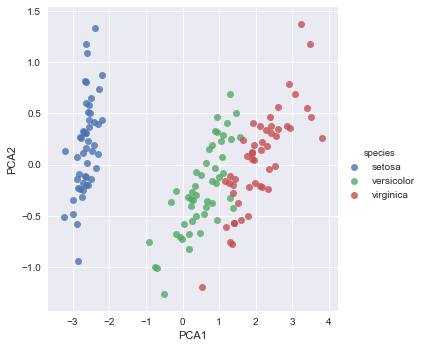

In [4]:
# 非监督学习降维例子
from sklearn.decomposition import PCA 
# n_components为保留的维度数
model = PCA(n_components=2)            
model.fit(X_iris)               
X_2D = model.transform(X_iris)
#print(X_2D.shape)

#降维后的数据可视化
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False);

print(iris.head())

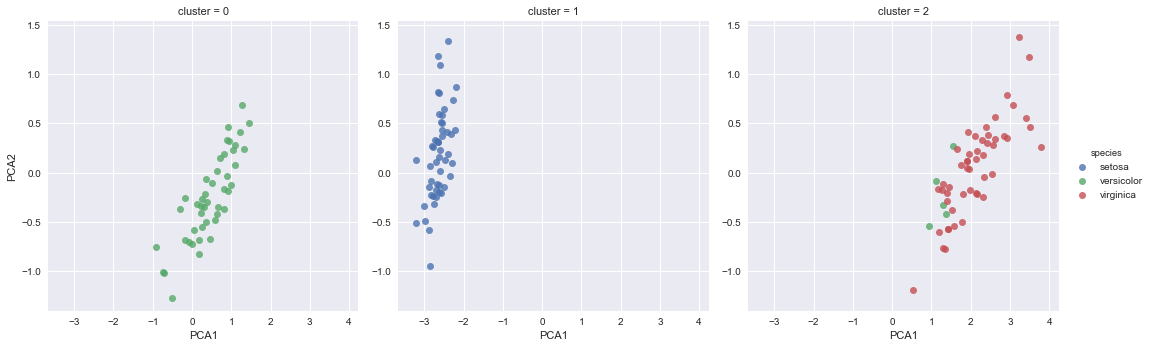

In [5]:
# 高斯混合模型聚类例子
from sklearn.mixture import GaussianMixture
# n_components指定分类的数目，covariance_type指的是协方差参数的类型
model = GaussianMixture(n_components=3, covariance_type='full')

model.fit(X_iris) 
y_gmm = model.predict(X_iris)
iris['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=iris, hue='species', col='cluster', fit_reg=False);

# 从下图可以看出错误分类的情况

In [6]:
# 手写数字识别例子
from sklearn.datasets import load_digits
# 加载数据
digits = load_digits()
print(digits.images.shape)

(1797, 8, 8)


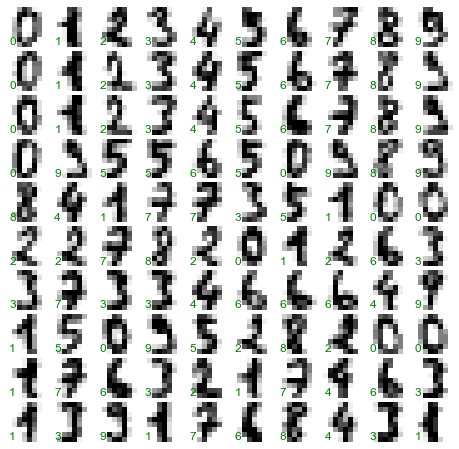

In [7]:
# 样本数1797，每一个图片是8*8像素
fig, axes = plt.subplots(10, 10, figsize=(8, 8), subplot_kw={'xticks':[], 'yticks':[]}, 
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]), transform=ax.transAxes, color='green')

In [8]:
X = digits.data
y = digits.target

# 划分训练数据集和测试数据集
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

from sklearn.metrics import accuracy_score
# 算法精度
accuracy_score(ytest, y_model)

0.83333333333333337

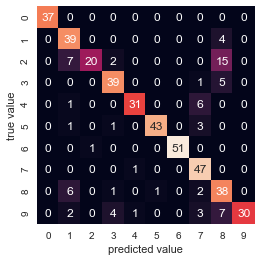

In [9]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

上图可以清晰看出错误分类的是哪些以及被错误识别成什么，如上数字1有4个被错误的认为是8，数字2有15个被认为是8。